# Project: Weather Conditions (2012)

## Environment set-up

In [3]:
##Importing libraries##

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## `Data Wrangling`

In [5]:
df = pd.read_csv("C:/Users/khale/DataSets/Weather_Dataa.csv")
df.head(10)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,1/1/2012 7:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,1/1/2012 8:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,1/1/2012 9:00,-1.3,-3.1,88,15,4.0,101.20,Fog


In [6]:
# printing dataframe columns' info
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


(8784, 8)

## `Data Cleaning`

In [8]:
# Wind Speed should be float !
df['Wind Speed_km/h'] = df['Wind Speed_km/h'].astype(float)

In [9]:
# Check for null values
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [10]:
# calculating duplicated values 
df.duplicated().sum()


0

In [11]:
# taking a look at number of unique values
df.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [12]:
# seperate column titles with underscore
df.columns = df.columns.str.replace(' ','_')
df

,Date/Time,Temp_C,Dew_Point_Temp_C,Rel_Hum_%,Wind_Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4.0,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4.0,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7.0,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6.0,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7.0,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30.0,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24.0,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28.0,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28.0,9.7,99.91,Snow


In [13]:
# insert new columns , split to fill them
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.insert(1, 'year', df['Date/Time'].dt.year)   
df.insert(2, 'month', df['Date/Time'].dt.month) 
df.insert(3, 'hour', df['Date/Time'].dt.hour)   

In [14]:
df.head()

,Date/Time,year,month,hour,Temp_C,Dew_Point_Temp_C,Rel_Hum_%,Wind_Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,2012,1,0,-1.8,-3.9,86,4.0,8.0,101.24,Fog
1,2012-01-01 01:00:00,2012,1,1,-1.8,-3.7,87,4.0,8.0,101.24,Fog
2,2012-01-01 02:00:00,2012,1,2,-1.8,-3.4,89,7.0,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,2012,1,3,-1.5,-3.2,88,6.0,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,2012,1,4,-1.5,-3.3,88,7.0,4.8,101.23,Fog


In [15]:
# confirming that the column has been converted to to_datetime
df['Date/Time'].dtype

dtype('<M8[ns]')

## `Data Visualisation`

In [17]:
# using groupby to get The months with the highest and lowest
monthly_stats = df.groupby('month')[['Temp_C', 'Rel_Hum_%', 'Wind_Speed_km/h']].mean().reset_index()

### The months with the highest and lowest (temp, relative humidity, wind speed)

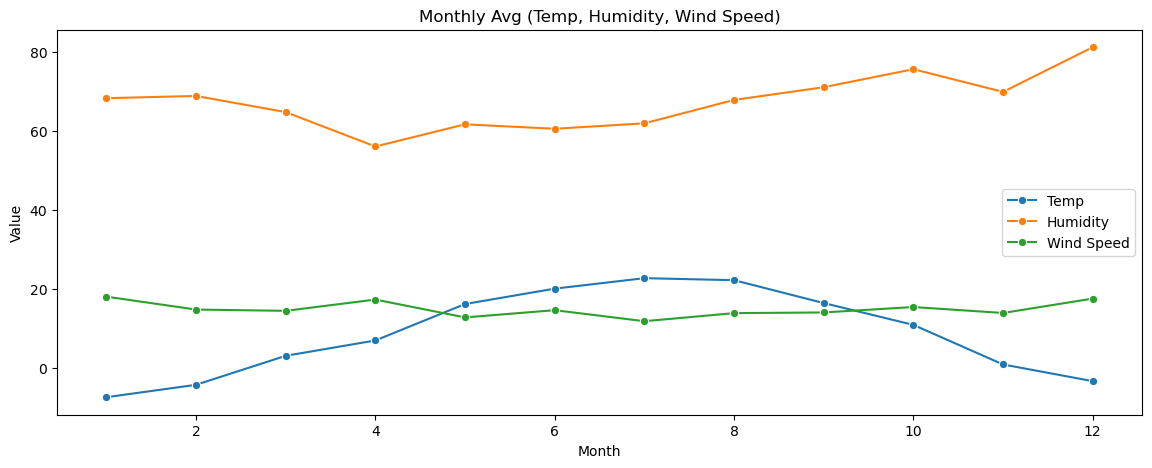

In [19]:

plt.figure(figsize=(14,5))
sns.lineplot(data=monthly_stats, x='month', y='Temp_C', marker='o', label="Temp")
sns.lineplot(data=monthly_stats, x='month', y='Rel_Hum_%', marker='o', label="Humidity")
sns.lineplot(data=monthly_stats, x='month', y='Wind_Speed_km/h', marker='o', label="Wind Speed")
plt.title("Monthly Avg (Temp, Humidity, Wind Speed)")
plt.xlabel("Month")
plt.ylabel("Value")
plt.legend()
plt.show()

### Hottest and coldest time of the day

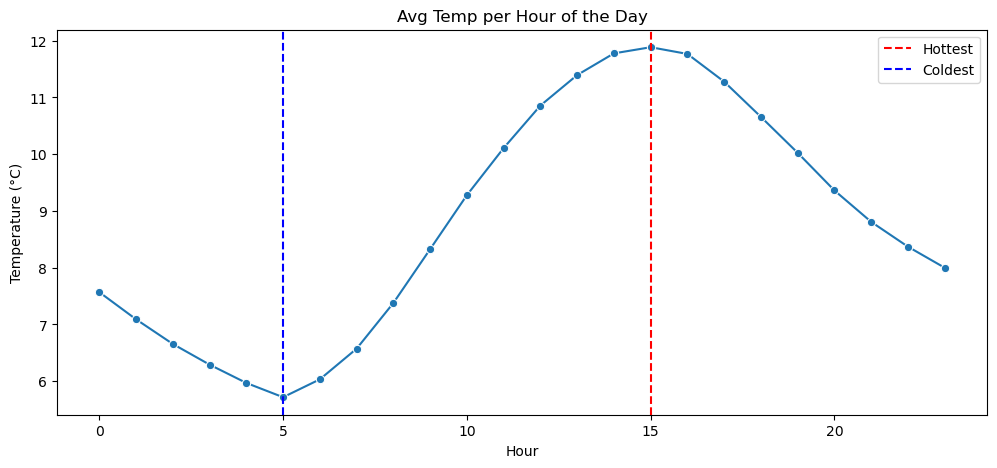

In [21]:

hourly_temp = df.groupby('hour')['Temp_C'].mean().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=hourly_temp, x='hour', y='Temp_C', marker='o')
plt.title("Avg Temp per Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Temperature (°C)")
plt.axvline(hourly_temp['hour'][hourly_temp['Temp_C'].idxmax()], color='r', linestyle='--', label="Hottest")
plt.axvline(hourly_temp['hour'][hourly_temp['Temp_C'].idxmin()], color='b', linestyle='--', label="Coldest")
plt.legend()
plt.show()


### Temp & Dew Point Correlation (scatterplot)

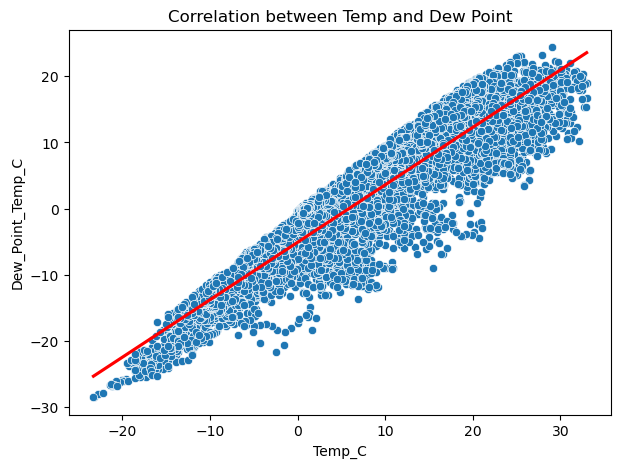

In [23]:

plt.figure(figsize=(7,5))
sns.scatterplot(data = df, x='Temp_C', y='Dew_Point_Temp_C')
sns.regplot(data=df , x = 'Temp_C', y = 'Dew_Point_Temp_C', scatter=False, color="red")
plt.title("Correlation between Temp and Dew Point")
plt.show()

### Hottest and coldest month

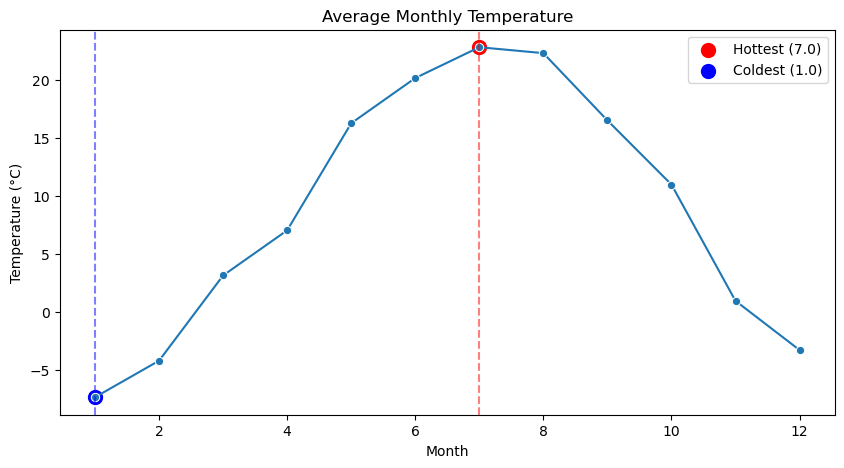

In [25]:

monthly_temp = df.groupby('month')['Temp_C'].mean().reset_index()
hottest = monthly_temp.loc[monthly_temp['Temp_C'].idxmax()]
coldest = monthly_temp.loc[monthly_temp['Temp_C'].idxmin()]

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_temp, x='month', y='Temp_C', marker='o')
plt.title("Average Monthly Temperature")

plt.scatter(hottest['month'], hottest['Temp_C'], color='r', s=100, label=f"Hottest ({hottest['month']})")
plt.axvline(hottest['month'], color='r', linestyle='--', alpha=0.5)

plt.scatter(coldest['month'], coldest['Temp_C'], color='b', s=100, label=f"Coldest ({coldest['month']})")
plt.axvline(coldest['month'], color='b', linestyle='--', alpha=0.5)

plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


### Average temperatures during the year

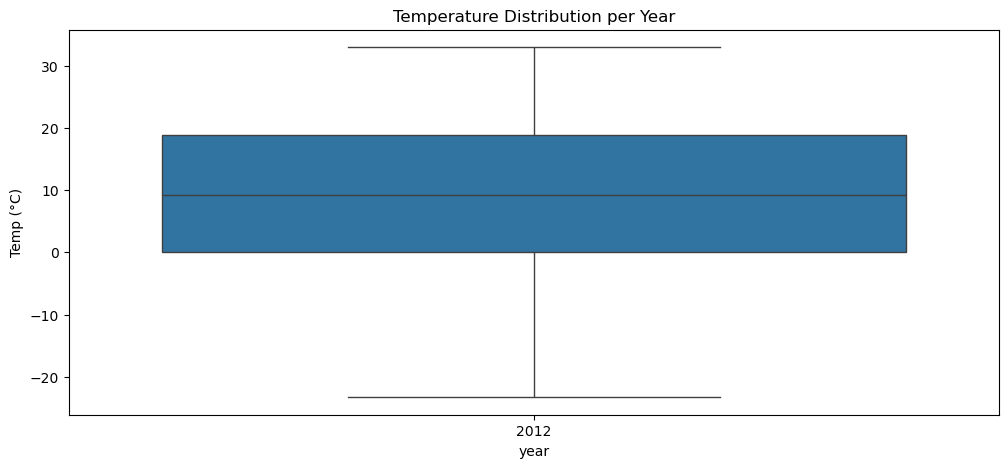

In [27]:

plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='year', y='Temp_C')
plt.title("Temperature Distribution per Year")
plt.ylabel("Temp (°C)")
plt.show()

### Points close to the black line → High humidity (Rel_Hum_% close to 100). The farther the points from the line → The lower the humidity. The colors (from cool to warm/red) represent different humidity levels.

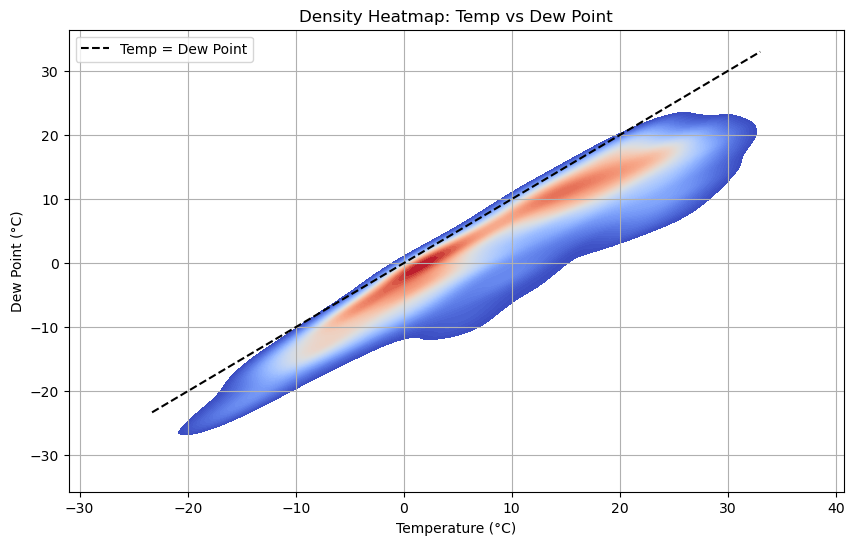

In [29]:
plt.figure(figsize=(10,6))

sns.kdeplot(data=df,x="Temp_C", y="Dew_Point_Temp_C", fill=True,cmap="coolwarm",thresh=0.05, levels=100)

plt.title("Density Heatmap: Temp vs Dew Point")
plt.xlabel("Temperature (°C)")
plt.ylabel("Dew Point (°C)")

plt.plot(
    [df['Temp_C'].min(), df['Temp_C'].max()],
    [df['Temp_C'].min(), df['Temp_C'].max()],
    color='black', linestyle='--', label='Temp = Dew Point'
)
plt.legend()
plt.grid(True)
plt.show()


### When pressure decreases, water vapor increases. High pressure = clear weather and high visibility. Low pressure = heavy rain and fog.

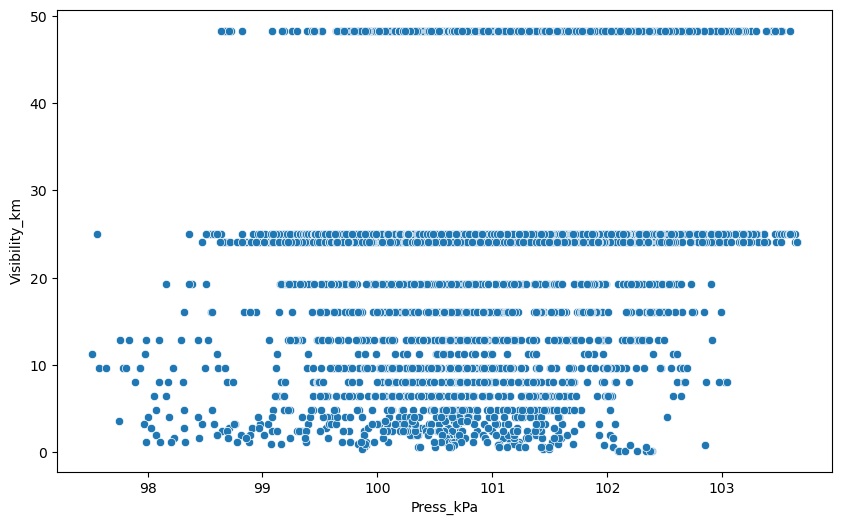

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Press_kPa', y='Visibility_km', )
plt.show()

### Temperature and pressure have a direct relationship, specifically for gases. As the temperature of a gas increases,its pressure also increases, assuming the volume and amount of gas remain constant.

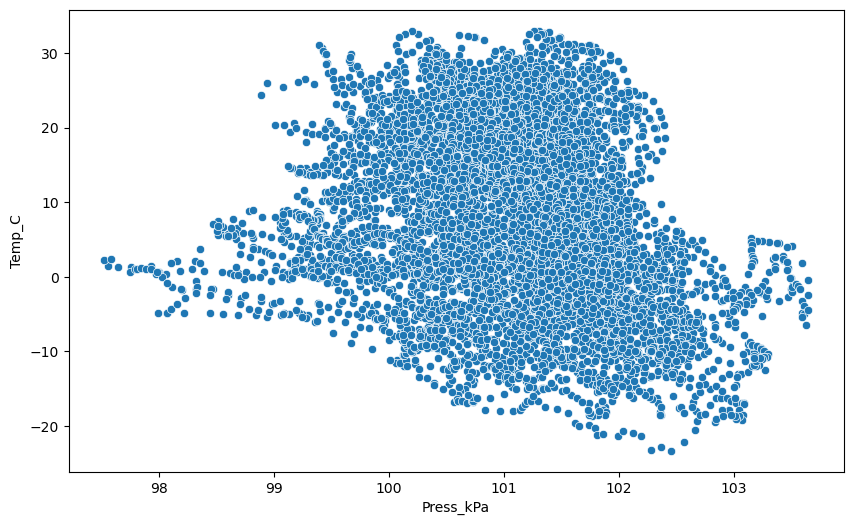

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Press_kPa', y='Temp_C', )
plt.show()

In [34]:
df.to_csv("final_data.csv", index=False)